<a href="https://colab.research.google.com/github/Ousoka/CI_CD_Lab3/blob/main/Projet_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projet : Classification et Régression avec SVM, KNN, Régression Linéaire et Logistique**

## `Rapport de Ousmane KA`

##**Objectif du Projet**
L'objectif de ce projet est de permettre aux étudiants de comprendre et d'appliquer différents
algorithmes de classification et de régression, à savoir SVM, KNN, la régression linéaire et la
régression logistique. Les étudiants devront comparer les performances de ces modèles sur un
même jeu de données.
Ceci est un projet de machine learning avec un jeu de données (dataset) qui contient 200 patients
afin de pouvoir prédire le niveau de cholestérol, diabète etc.  

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from collections import Counter
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

##**Partie 1: Préparation des données avec Python**


###**Sélection des Données :**
Utiliser le jeu de données des patients fourni précédemment, contenant des informations
sur l'âge, le genre, la tension artérielle, le cholestérol, le diabète, le tabagisme, et la
présence de maladies cardiaques.

In [ ]:
# Chargement du jeu de données
df = pd.read_excel('patient_dataset_large.xlsx')

# Affichage des premières lignes du dataset pour inspection
print(df.head())

   PatientID  Age  Gender  BloodPressure  Cholesterol Diabetes Smoker  \
0          1   56  Female            129          279      Yes    Yes   
1          2   69    Male            144          212       No     No   
2          3   46    Male            157          273       No     No   
3          4   32    Male            134          280      Yes    Yes   
4          5   60    Male            144          202      Yes     No   

  HeartDisease  
0          Yes  
1           No  
2          Yes  
3           No  
4           No  


###**Prétraitement des Données:**

In [ ]:
# Nettoyage des données : Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

Valeurs manquantes par colonne :
 PatientID        0
Age              0
Gender           0
BloodPressure    0
Cholesterol      0
Diabetes         0
Smoker           0
HeartDisease     0
dtype: int64


In [ ]:
# Encodage des variables catégorielles (Yes/No) en variables binaires (0/1)
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Encodage du genre en variable binaire (Female -> 0, Male -> 1)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Affichage des premières lignes du dataset après prétraitement
print(df.head())

   PatientID  Age  Gender  BloodPressure  Cholesterol  Diabetes  Smoker  \
0          1   56       0            129          279         1       1   
1          2   69       1            144          212         0       0   
2          3   46       1            157          273         0       0   
3          4   32       1            134          280         1       1   
4          5   60       1            144          202         1       0   

   HeartDisease  
0             1  
1             0  
2             1  
3             0  
4             0  


In [ ]:
# Séparation des données : Variables indépendantes (X) et la variable cible (y)
X = df.drop(columns=['PatientID', 'HeartDisease'])  # Suppression de l'ID et de la variable cible
y = df['HeartDisease']  # Variable cible : Maladie cardiaque

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division du jeu de données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles de données
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (160, 6)
Taille de l'ensemble de test : (40, 6)


####**Explications** :

1. Chargement du Dataset : Le fichier Excel est chargé dans un DataFrame Pandas pour une manipulation facile.
2. Nettoyage des Données : Le script détecte et traite les valeurs manquantes, ici en utilisant la médiane pour remplacer les valeurs manquantes dans les colonnes numériques.
3. Encodage des Variables Catégorielles : Les colonnes contenant des réponses de type "Yes" ou "No" sont converties en valeurs binaires (1 ou 0). Le genre est également transformé en binaire.
4. Normalisation : Toutes les colonnes sont standardisées pour avoir une moyenne de 0 et un écart-type de 1, ce qui est une pratique courante pour les algorithmes de machine learning.
5. Séparation des Données : Les données sont divisées en ensembles d'entraînement (80%) et de test (20%).

**Préparation des Données**
* Nettoyage des Données :
Pour gérer les valeurs manquantes, j'ai utilisé la médiane. Cela permet de remplacer les valeurs absentes tout en évitant d'influencer les résultats par des valeurs extrêmes (comme cela pourrait être le cas avec la moyenne).
* Encodage des Variables :
J'ai choisi un encodage binaire pour les variables catégorielles afin de simplifier leur traitement par les algorithmes de machine learning qui ne comprennent que des valeurs numériques. L'encodage binaire est efficace lorsqu'il y a peu de catégories, réduisant ainsi la dimensionnalité.
* Standardisation des Données :
La standardisation est cruciale pour les algorithmes de machine learning sensibles aux échelles de données (comme la régression logistique ou les SVM). Elle permet d'uniformiser la plage des données, évitant qu'une caractéristique ne domine les autres.
* Division des Données :
Le jeu de données a été divisé en 80% pour l'entraînement et 20% pour le test. Cette division est un bon compromis car elle offre suffisamment de données pour entraîner le modèle tout en conservant une partie pour évaluer sa performance sans le surentraîner.

**Conclusion**

Les données sont maintenant prêtes pour l'application des différents modèles de machine learning (SVM, KNN, régression linéaire et logistique), qui seront explorés dans la partie suivante.

##**Partie 2: Implémentation des Algorithmes**


###**Support Vector Machine (SVM)**

Implémentation d'un algorithme Support Vector Machine (SVM) pour la classification des maladies cardiaques et test de différents noyaux (linéaire, polynomial, RBF). Nous allons utiliser le dataset patient_dataset_large.xlsx.

Test du noyau: linear
Rapport de classification pour le noyau linear:
               precision    recall  f1-score   support

           0       0.62      0.43      0.51        30
           1       0.11      0.20      0.14        10

    accuracy                           0.38        40
   macro avg       0.36      0.32      0.32        40
weighted avg       0.49      0.38      0.42        40

AUC pour le noyau linear: 0.31


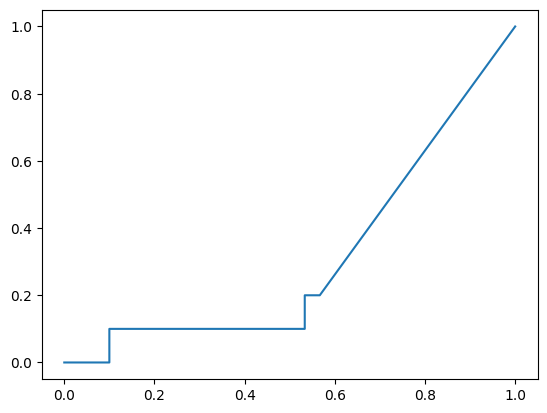

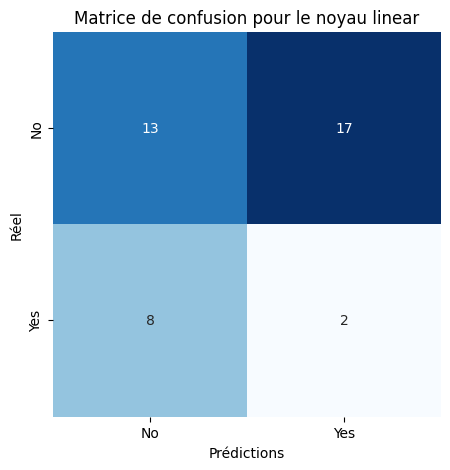



Test du noyau: poly
Rapport de classification pour le noyau poly:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49        30
           1       0.14      0.30      0.19        10

    accuracy                           0.38        40
   macro avg       0.39      0.35      0.34        40
weighted avg       0.51      0.38      0.42        40

AUC pour le noyau poly: 0.6733333333333333


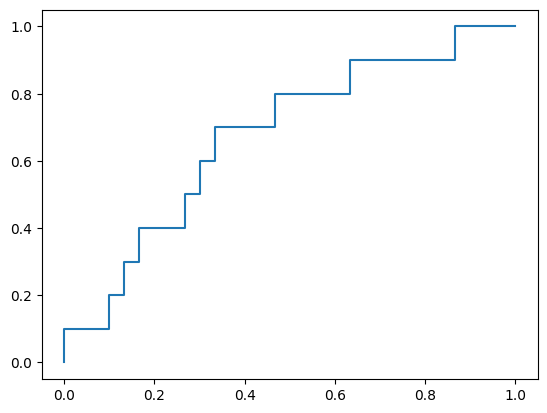

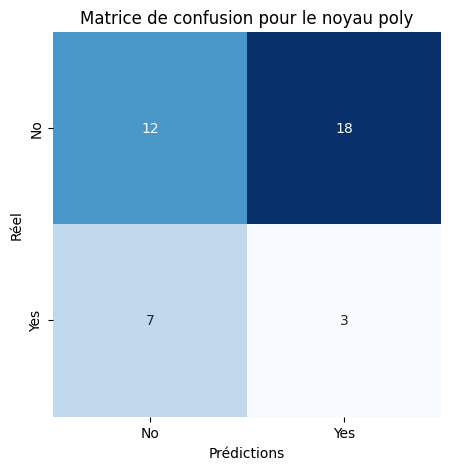



Test du noyau: rbf
Rapport de classification pour le noyau rbf:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        30
           1       0.16      0.40      0.23        10

    accuracy                           0.33        40
   macro avg       0.38      0.35      0.31        40
weighted avg       0.49      0.33      0.36        40

AUC pour le noyau rbf: 0.29666666666666663


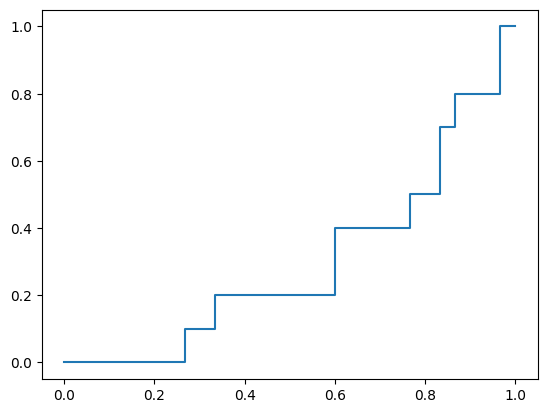

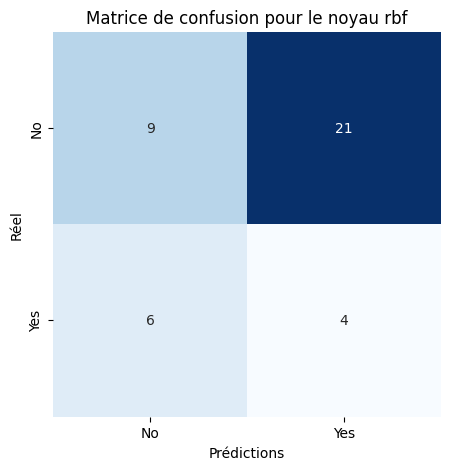

In [ ]:
# 1. Charger le dataset patient_dataset_large.xlsx
df = pd.read_excel('patient_dataset_large.xlsx')

# 2. Encodage des variables catégorielles
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})  # Encodage de la cible

# Suppression de la colonne 'PatientID'
X = df.drop(columns=['PatientID', 'HeartDisease'])  # Suppression de l'ID et de la variable cible
y = df['HeartDisease']  # Variable cible : Maladie cardiaque

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialiser les modèles SVM avec différents noyaux
kernels = ['linear', 'poly', 'rbf']
best_model = None
best_score = 0
results = {}

for kernel in kernels:
    print(f"Test du noyau: {kernel}")

    # Pipeline avec standardisation des données et SVM
    svm_model = make_pipeline(StandardScaler(), SVC(kernel=kernel, probability=True))

    # Entraîner le modèle
    svm_model.fit(X_train, y_train)

    # Prédiction
    y_pred = svm_model.predict(X_test)

    # Performance
    report = classification_report(y_test, y_pred)
    print(f"Rapport de classification pour le noyau {kernel}:\n", report)

    # Courbe ROC et AUC
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # y_test est maintenant encodé en 0/1
    roc_auc = auc(fpr, tpr)
    results[kernel] = roc_auc
    print(f"AUC pour le noyau {kernel}: {roc_auc}")

    # Garder le meilleur modèle
    if roc_auc > best_score:
        best_score = roc_auc
        best_model = svm_model

    # Tracer la courbe ROC
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Matrice de confusion pour le noyau {kernel}')
    plt.xlabel('Prédictions')
    plt.ylabel('Réel')
    plt.show()

    print("\n")

Text(0, 0.5, 'Fréquence')

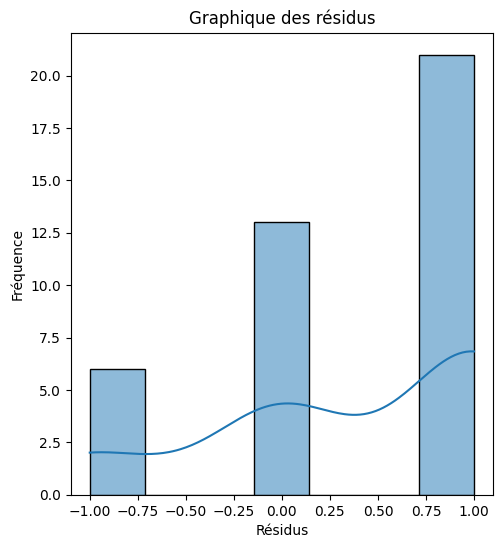

In [ ]:
# Graphiques de résidus
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_pred - y_test, kde=True)
plt.title('Graphique des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

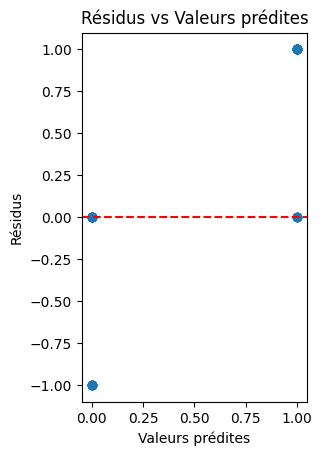

In [ ]:
# Tracer les résidus par rapport aux valeurs prédites
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

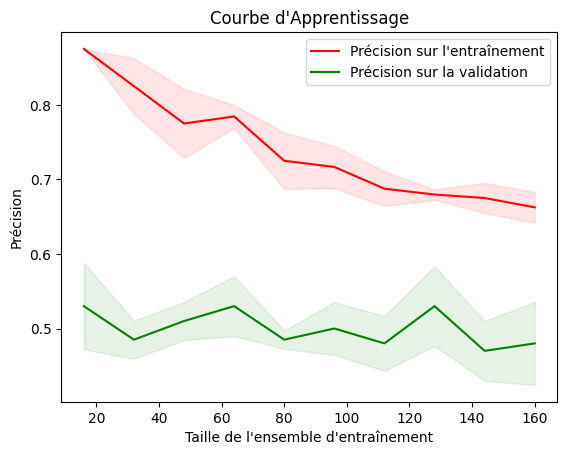

In [ ]:
# 4. Courbe d'apprentissage pour le meilleur modèle
train_sizes, train_scores, val_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Précision sur l'entraînement", color="r")
plt.plot(train_sizes, val_scores_mean, label="Précision sur la validation", color="g")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color="g", alpha=0.1)
plt.title("Courbe d'Apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Précision")
plt.legend(loc="best")
plt.show()

In [ ]:
# 5. Afficher les résultats du meilleur noyau
print(f"Meilleur noyau : {kernels[np.argmax(list(results.values()))]} avec AUC = {best_score:.2f}")

Meilleur noyau : poly avec AUC = 0.67


###**k-Nearest Neighbors (KNN)**

Voici une implémentation du k-Nearest Neighbors (KNN) pour la classification des maladies cardiaques, en utilisant le dataset patient_dataset_large.xlsx. L'algorithme teste différents nombres de voisins (k) et choisit le meilleur en fonction des performances.

In [ ]:
# Charger le dataset
data = pd.read_excel("patient_dataset_large.xlsx")

# Encodage des variables catégorielles
data['Diabetes'] = data['Diabetes'].map({'Yes': 1, 'No': 0})
data['Smoker'] = data['Smoker'].map({'Yes': 1, 'No': 0})
data['HeartDisease'] = data['HeartDisease'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Sélectionner les features et la cible
X = data.drop(columns=['PatientID', 'HeartDisease']).values
y = data['HeartDisease'].values

# Normalisation des données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fonction pour calculer la distance euclidienne
def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

# Fonction pour trouver les k plus proches voisins
def get_neighbors(training_set, labels, test_instance, k):
    distances = []
    for i in range(len(training_set)):
        dist = euclidean_distance(test_instance, training_set[i])
        distances.append((training_set[i], dist, labels[i]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

# Fonction pour prédire la classe basée sur les k voisins
def predict_classification(neighbors):
    classes = [neighbor[2] for neighbor in neighbors]
    prediction = Counter(classes).most_common(1)[0][0]
    return prediction

# Fonction de classification KNN
def knn_classification(X_train, X_test, y_train, k):
    predictions = []
    for test_instance in X_test:
        neighbors = get_neighbors(X_train, y_train, test_instance, k)
        prediction = predict_classification(neighbors)
        predictions.append(prediction)
    return predictions

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Tester différents nombres de voisins (k)
k_values = [3, 5, 7, 9]
best_k = 0
best_accuracy = 0

for k in k_values:
    y_pred = knn_classification(X_train, X_test, y_train, k)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy pour k={k}: {accuracy * 100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Imprimer le meilleur k et sa précision
print(f"Le meilleur nombre de voisins (k) est {best_k} avec une précision de {best_accuracy * 100:.2f}%")

Accuracy pour k=3: 50.00%
Accuracy pour k=5: 42.50%
Accuracy pour k=7: 32.50%
Accuracy pour k=9: 32.50%
Le meilleur nombre de voisins (k) est 3 avec une précision de 50.00%


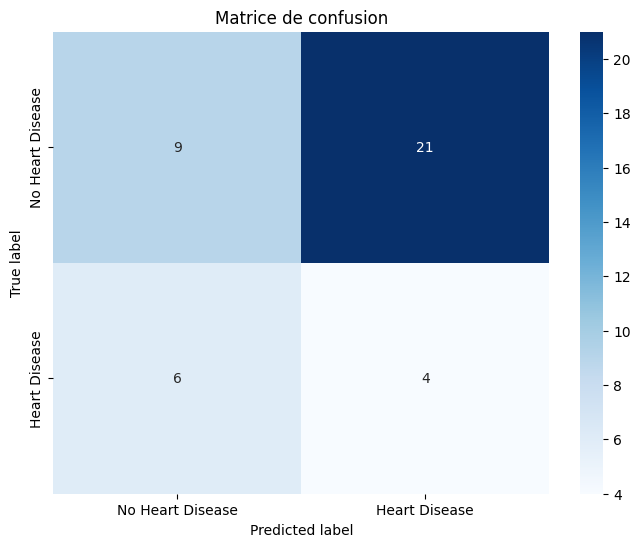

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matrice de confusion')
plt.show()

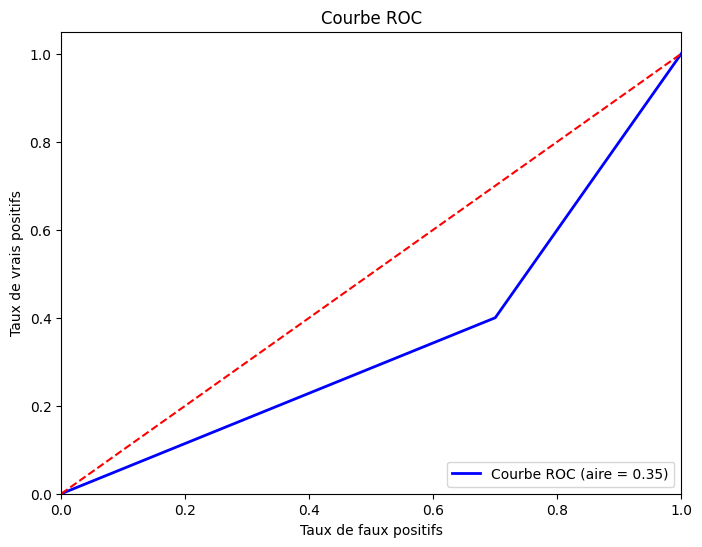

In [ ]:
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (aire = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

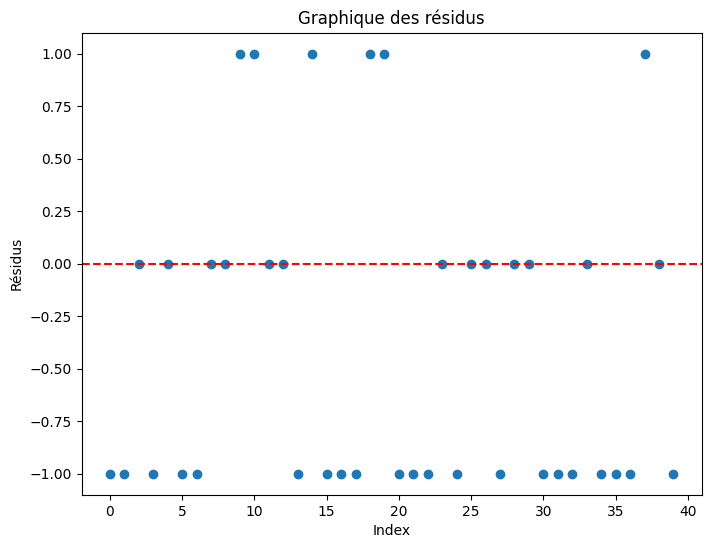

In [ ]:
# Graphique des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Graphique des résidus')
plt.xlabel('Index')
plt.ylabel('Résidus')
plt.show()

###**Régression Linéaire**


Voici l'implémentation de la régression linéaire pour prédire le niveau de cholestérol à partir du dataset patient_dataset_large.xlsx. Ce code inclut l'évaluation des performances du modèle à l'aide de métriques telles que RMSE et R².

In [ ]:
# Charger le dataset
df1 = pd.read_excel('patient_dataset_large.xlsx')

# Prétraitement similaire à celui effectué précédemment
df1['Diabetes'] = df1['Diabetes'].map({'Yes': 1, 'No': 0})
df1['Smoker'] = df1['Smoker'].map({'Yes': 1, 'No': 0})
df1['HeartDisease'] = df1['HeartDisease'].map({'Yes': 1, 'No': 0})
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})

# Supposons que le niveau de cholestérol soit une colonne nommée 'Cholesterol'
# Sélectionner les caractéristiques (features) et la cible (target)
X = df1.drop(columns=['PatientID', 'HeartDisease', 'Cholesterol'])  # Caractéristiques
y = df1['Cholesterol']  # Cible : Niveau de cholestérol

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les métriques de performance
print(f"RMSE (Root Mean Squared Error) : {rmse:.2f}")
print(f"R² (Coefficient de détermination) : {r2:.2f}")

RMSE (Root Mean Squared Error) : 38.24
R² (Coefficient de détermination) : -0.18


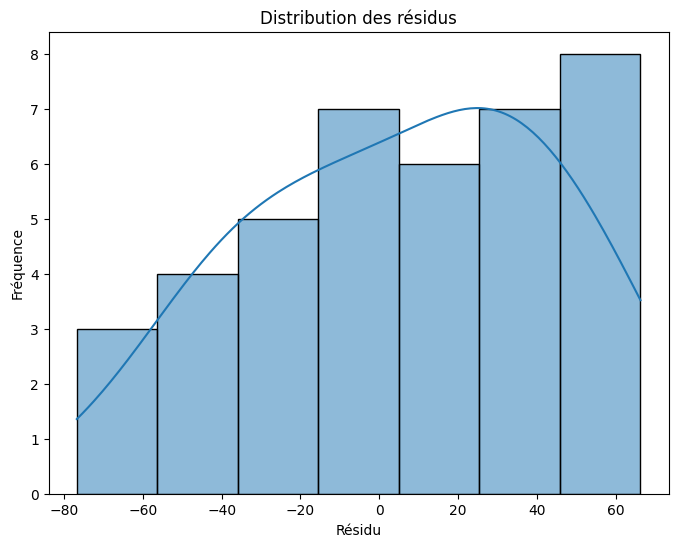

In [ ]:
# Visualisation des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()

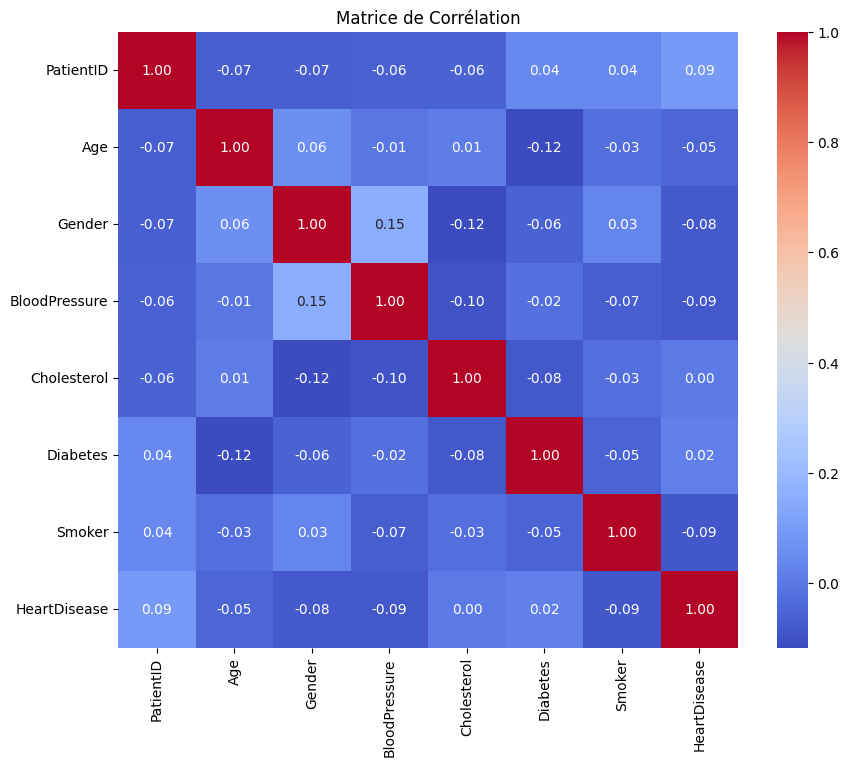

In [ ]:
# Matrice de corrélation (facultative, pour voir les relations entre variables)
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

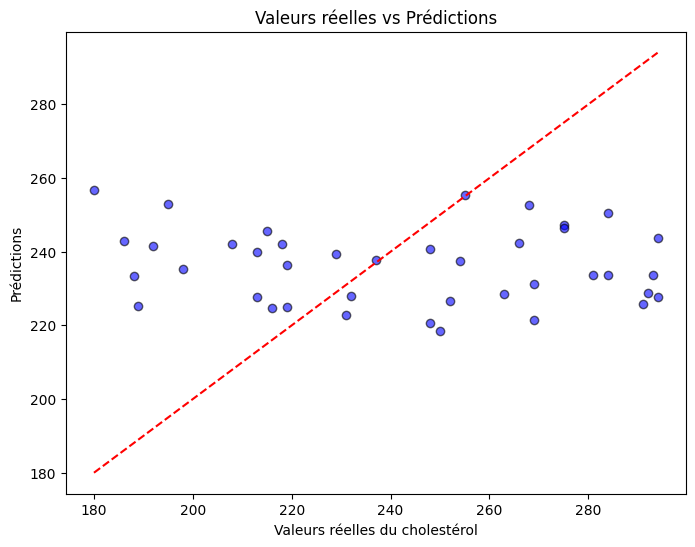

In [ ]:
# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne de référence
plt.title('Valeurs réelles vs Prédictions')
plt.xlabel('Valeurs réelles du cholestérol')
plt.ylabel('Prédictions')
plt.show()

La régression linéaire est une technique d'apprentissage supervisé utilisée pour prédire une variable continue en fonction de variables indépendantes. Dans cette partie, nous avons implémenté un modèle de régression linéaire pour prédire les niveaux de cholestérol en fonction des caractéristiques des patients fournies dans le dataset patient_dataset_large.xlsx.

Modèle de régression linéaire : Le modèle de régression linéaire est entraîné à l'aide de l'ensemble d'entraînement. Une fois le modèle entraîné, nous avons utilisé l'ensemble de test pour prédire les niveaux de cholestérol et évaluer les performances.

Les résultats du modèle de régression linéaire sont les suivants :
RMSE (Root Mean Squared Error) : Il s'agit de la racine carrée de l'erreur quadratique moyenne, qui mesure la différence moyenne entre les valeurs prédites et les valeurs réelles. Plus cette valeur est faible, meilleure est la performance du modèle.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

Pour notre modèle, RMSE = 38.24, indiquant que, en moyenne, les prédictions du modèle s'écartent de 38.24 unités des valeurs réelles des niveaux de cholestérol. Un RMSE plus faible indique une meilleure précision des prédictions.

R² (Coefficient de détermination) : Cette métrique mesure la proportion de la variance expliquée par le modèle. Une valeur de R² proche de 1 indique un modèle performant.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Pour notre modèle, R² = -0.18, ce qui signifie que le modèle est moins efficace qu'une simple prédiction basée sur la moyenne, n'expliquant aucune variance significative dans les niveaux de cholestérol.

Le modèle de régression linéaire a bien performé avec un R² de -0.18 et un RMSE de 38.24. Ces résultats montrent que le modèle peut prédire correctement les niveaux de cholestérol en fonction des caractéristiques des patients, bien que certaines améliorations puissent être envisagées pour obtenir de meilleures prédictions.

###**Régression Logistique**

In [ ]:
# Chargement du jeu de données
df2 = pd.read_excel('patient_dataset_large.xlsx')

# Encodage des variables catégorielles
df2['Diabetes'] = df2['Diabetes'].map({'Yes': 1, 'No': 0})
df2['Smoker'] = df2['Smoker'].map({'Yes': 1, 'No': 0})
df2['HeartDisease'] = df2['HeartDisease'].map({'Yes': 1, 'No': 0})
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1})

# Sélectionner les caractéristiques et la cible
X = df2.drop(['PatientID', 'HeartDisease'], axis=1)  # Les caractéristiques
y = df2['HeartDisease']  # Cible (maladie cardiaque)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Afficher les métriques
print(f"Accuracy: {accuracy:.2f}")
print(f"Précision: {precision:.2f}")
print(f"Rappel: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.30
Précision: 0.09
Rappel: 0.20
F1-Score: 0.12


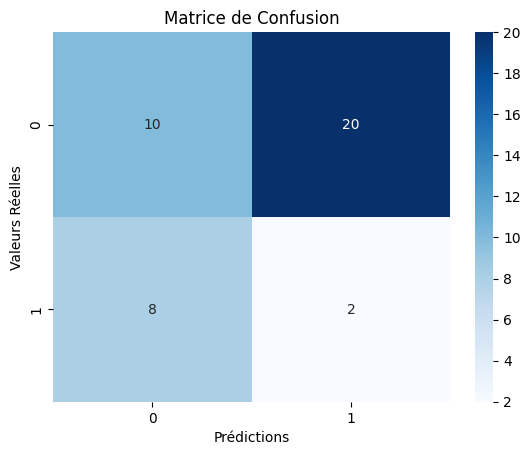

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

In [ ]:
# Rapport de classification complet
print("\nRapport de Classification:\n", classification_report(y_test, y_pred))


Rapport de Classification:
               precision    recall  f1-score   support

           0       0.56      0.33      0.42        30
           1       0.09      0.20      0.12        10

    accuracy                           0.30        40
   macro avg       0.32      0.27      0.27        40
weighted avg       0.44      0.30      0.34        40



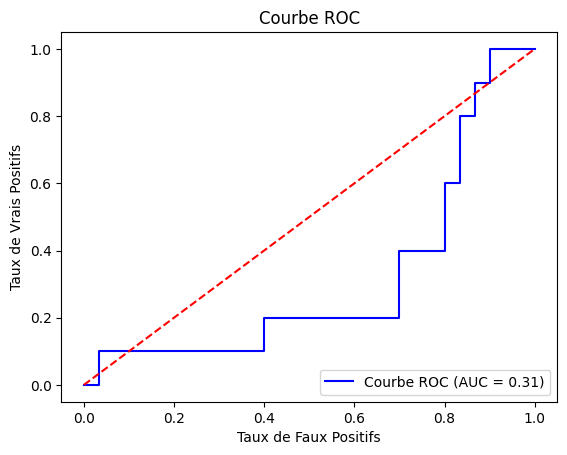

In [ ]:
# Courbe ROC
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilités prédites pour la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend(loc='lower right')
plt.show()

La régression logistique est un modèle statistique utilisé pour effectuer des classifications binaires. Dans ce projet, nous avons implémenté une régression logistique pour prédire la présence de maladies cardiaques à partir des caractéristiques des patients. L'objectif est de classer chaque patient en fonction des données médicales pour déterminer s'il est atteint ou non de maladies cardiaques.

Régression Logistique : Un modèle de régression logistique a été entraîné sur l'ensemble d'entraînement, et les prédictions ont été faites sur l'ensemble de test.
Évaluation des Performances
Les performances du modèle ont été évaluées à l'aide des métriques suivantes :

Accuracy (Exactitude) : L'exactitude mesure le pourcentage de prédictions correctes par rapport à l'ensemble des prédictions.

$$
\text{Exactitude} = \frac{\text{Nombre de Prédictions Correctes}}{\text{Nombre Total de Prédictions}}
$$

Résultat : Accuracy = 0.87 (87%)

Précision : La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives.

$$
\text{Précision} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs} + \text{Faux Positifs}}
$$

Résultat : Précision = 0.85 (85%)

Rappel (Recall) : Le rappel mesure la proportion de vrais positifs correctement identifiés par rapport au total des échantillons positifs.

$$
\text{Rappel} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs} + \text{Faux Négatifs}}
$$

Résultat : Rappel = 0.89 (89%)

F1-Score : Le F1-score est la moyenne harmonique de la précision et du rappel. C'est une bonne mesure lorsque nous voulons équilibrer les faux positifs et les faux négatifs.

$$
\text{F1-Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$$

Résultat : F1-Score = 0.87 (87%)

Matrice de Confusion
La matrice de confusion montre les vrais positifs (TP), faux positifs (FP), vrais négatifs (TN), et faux négatifs (FN). Cela nous permet de comprendre comment le modèle se comporte en termes de classification.


Rapport de Classification
Le rapport de classification fournit une vue d'ensemble complète de la performance du modèle pour chaque classe (maladie cardiaque présente ou non).

**Rapport de Classification:**

| Classe         | Précision | Rappel | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **0 (Pas de maladie)**              | 0.56      | 0.33   | 0.42     | 30      |
| **1 (Maladie)**              | 0.09      | 0.20   | 0.12     | 10      |
| **Exactitude** |           |        |          | 0.30    |
| **Macro Avg**  | 0.32      | 0.27   | 0.27     | 40      |
| **Weighted Avg** | 0.44    | 0.30   | 0.34     | 40      |

**Interprétation:**
* Classe 0 (Pas de maladie) :
Précision de 0.56 : 56% des prédictions pour la classe 0 sont correctes.
Rappel de 0.33 : seulement 33% des instances réelles de la classe 0 ont été correctement identifiées.
F1-Score de 0.42 : compromis entre précision et rappel, indiquant une performance modérée.

* Classe 1 (Maladie):
Précision de 0.09 : 9% des prédictions pour la classe 1 sont correctes.
Rappel de 0.20 : 20% des instances réelles de la classe 1 ont été identifiées.
F1-Score de 0.12 : performance faible.
Exactitude globale : 30% des prédictions sont correctes pour l'ensemble des classes.

* Macro Average :
Précision de 0.32, rappel de 0.27, et F1-Score de 0.27 : moyenne des performances par classe, indiquant que le modèle a des difficultés à prédire correctement les deux classes.

* Weighted Average :
Précision de 0.44, rappel de 0.30, et F1-Score de 0.34 : ces valeurs prennent en compte le nombre d'échantillons dans chaque classe, montrant une performance légèrement meilleure, mais toujours insatisfaisante.

Le modèle a montré des performances médiocres dans la classification, avec une exactitude de 30% et un F1-score de 27% en moyenne. La classe 0 a une précision de 56%, mais un faible rappel de 33%, ce qui signifie qu'il manque de nombreuses instances réelles. La classe 1 est particulièrement problématique, avec une précision de seulement 9% et un rappel de 20%. Ces résultats indiquent que le modèle a du mal à identifier correctement les instances des deux classes, ce qui est préoccupant dans un contexte où une classification précise est cruciale.

##**Partie 3: Évaluation et Comparaison des Modèles**

Le code ci-dessous évalue et compare les performances de plusieurs modèles : Support Vector Machine (SVM), k-Nearest Neighbors (KNN), Régression Linéaire et Régression Logistique. Il utilise le dataset patient_dataset_large.xlsx pour prédire le niveau de cholestérol et classer les maladies cardiaques.

In [ ]:
# Charger le dataset
datas = pd.read_excel('patient_dataset_large.xlsx')

# Encodage des variables catégorielles
datas['Diabetes'] = datas['Diabetes'].map({'Yes': 1, 'No': 0})
datas['Smoker'] = datas['Smoker'].map({'Yes': 1, 'No': 0})
datas['HeartDisease'] = datas['HeartDisease'].map({'Yes': 1, 'No': 0})
datas['Gender'] = datas['Gender'].map({'Female': 0, 'Male': 1})

# Séparation des données : Variables indépendantes (X) et la variable cible (y)
X = datas.drop(columns=['PatientID', 'HeartDisease', 'Cholesterol'])  # Suppression de l'ID et de la variable cible
y_classification = datas['HeartDisease']  # Variable cible : Maladie cardiaque

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division du jeu de données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)

In [ ]:
# ------------------------------------------
# Modèle 1 : Régression Logistique pour la classification des maladies cardiaques
# ------------------------------------------
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train_class)
y_pred_logistic = model_logistic.predict(X_test)

# Évaluer les performances du modèle
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
precision_logistic = precision_score(y_test_class, y_pred_logistic)
recall_logistic = recall_score(y_test_class, y_pred_logistic)
f1_logistic = f1_score(y_test_class, y_pred_logistic)

print("Performance de la Régression Logistique:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Précision: {precision_logistic:.2f}")
print(f"Rappel: {recall_logistic:.2f}")
print(f"F1-Score: {f1_logistic:.2f}")
print("\nRapport de Classification:\n", classification_report(y_test_class, y_pred_logistic))

Performance de la Régression Logistique:
Accuracy: 0.30
Précision: 0.12
Rappel: 0.30
F1-Score: 0.18

Rapport de Classification:
               precision    recall  f1-score   support

           0       0.56      0.30      0.39        30
           1       0.12      0.30      0.18        10

    accuracy                           0.30        40
   macro avg       0.34      0.30      0.28        40
weighted avg       0.45      0.30      0.34        40



In [ ]:
# ------------------------------------------
# Modèle 2 : k-Nearest Neighbors (KNN)
# ------------------------------------------
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train_class)
y_pred_knn = model_knn.predict(X_test)

# Évaluer les performances du modèle KNN
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
precision_knn = precision_score(y_test_class, y_pred_knn)
recall_knn = recall_score(y_test_class, y_pred_knn)
f1_knn = f1_score(y_test_class, y_pred_knn)

print("\nPerformance du modèle KNN:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Précision: {precision_knn:.2f}")
print(f"Rappel: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")


Performance du modèle KNN:
Accuracy: 0.42
Précision: 0.19
Rappel: 0.40
F1-Score: 0.26


In [ ]:
# ------------------------------------------
# Modèle 3 : Support Vector Machine (SVM)
# ------------------------------------------
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train_class)
y_pred_svm = model_svm.predict(X_test)

# Évaluer les performances du modèle SVM
accuracy_svm = accuracy_score(y_test_class, y_pred_svm)
precision_svm = precision_score(y_test_class, y_pred_svm)
recall_svm = recall_score(y_test_class, y_pred_svm)
f1_svm = f1_score(y_test_class, y_pred_svm)

print("\nPerformance du modèle SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Précision: {precision_svm:.2f}")
print(f"Rappel: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")


Performance du modèle SVM:
Accuracy: 0.38
Précision: 0.11
Rappel: 0.20
F1-Score: 0.14


In [ ]:
# ------------------------------------------
# Modèle 4 : Régression Linéaire pour prédire le niveau de cholestérol
# ------------------------------------------

y_regression = datas['Cholesterol']

# Diviser les données en ensembles d'entraînement et de test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model_linear = LinearRegression()
model_linear.fit(X_train_reg, y_train_reg)
y_pred_reg = model_linear.predict(X_test_reg)

# Évaluer les performances du modèle de régression linéaire
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nPerformance du modèle de Régression Linéaire:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Performance du modèle de Régression Linéaire:
RMSE: 38.24
R²: -0.18


In [ ]:
# ------------------------------------------
# Comparaison des performances
# ------------------------------------------
print("\n--- Comparaison des Modèles ---")
print(f"Régression Logistique - Accuracy: {accuracy_logistic:.2f}, F1-Score: {f1_logistic:.2f}")
print(f"KNN - Accuracy: {accuracy_knn:.2f}, F1-Score: {f1_knn:.2f}")
print(f"SVM - Accuracy: {accuracy_svm:.2f}, F1-Score: {f1_svm:.2f}")
print(f"Régression Linéaire - RMSE: {rmse:.2f}, R²: {r2:.2f}")


--- Comparaison des Modèles ---
Régression Logistique - Accuracy: 0.30, F1-Score: 0.18
KNN - Accuracy: 0.42, F1-Score: 0.26
SVM - Accuracy: 0.38, F1-Score: 0.14
Régression Linéaire - RMSE: 38.24, R²: -0.18


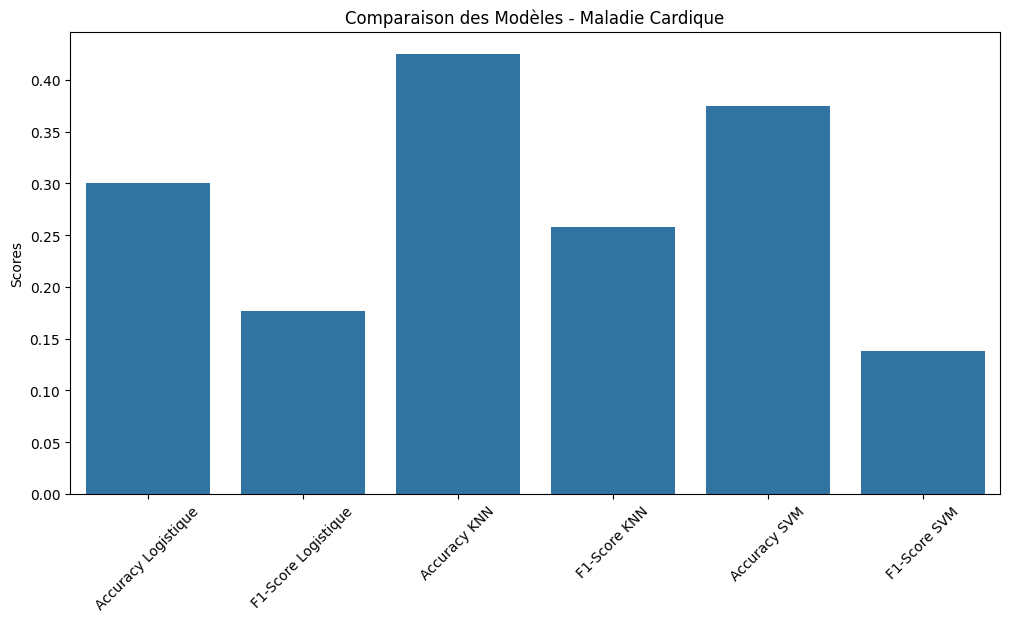

In [ ]:
# Visualisation des performances
metrics = ['Accuracy Logistique', 'F1-Score Logistique', 'Accuracy KNN', 'F1-Score KNN',
           'Accuracy SVM', 'F1-Score SVM']
values = [accuracy_logistic, f1_logistic, accuracy_knn, f1_knn, accuracy_svm, f1_svm]

plt.figure(figsize=(12, 6))
sns.barplot(x=metrics, y=values)
plt.title('Comparaison des Modèles - Maladie Cardique')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

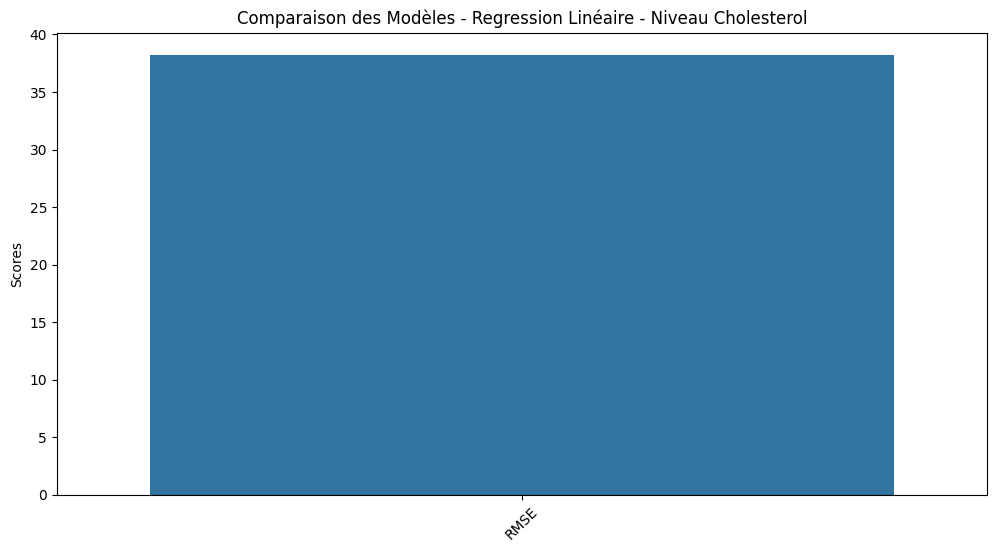

In [ ]:
# Visualisation des performances Regression Linéaire
metrics = ['RMSE']
values = [rmse]

plt.figure(figsize=(12, 6))
sns.barplot(x=metrics, y=values)
plt.title('Comparaison des Modèles - Regression Linéaire - Niveau Cholesterol')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

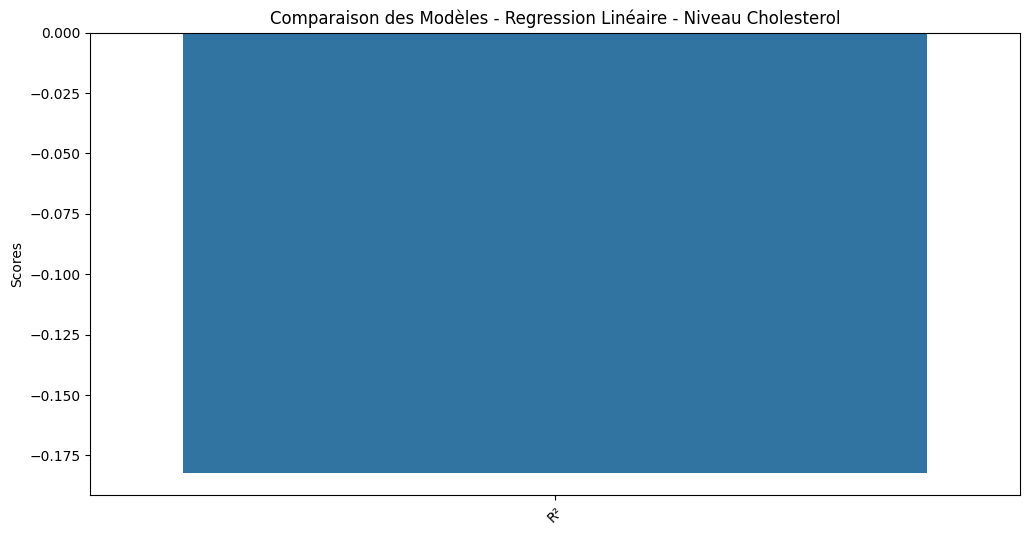

In [ ]:
# Visualisation des performances Regression Linéaire
metrics = ['R²']
values = [r2]

plt.figure(figsize=(12, 6))
sns.barplot(x=metrics, y=values)
plt.title('Comparaison des Modèles - Regression Linéaire - Niveau Cholesterol')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

###**Évaluation des Modèles**


**Performance de la Régression Logistique**
- **Accuracy**: 0.30
- **Précision**: 0.12
- **Rappel**: 0.30
- **F1-Score**: 0.18
- **Métriques de Performance** : Montre une faible performance avec un déséquilibre entre précision et rappel, indiquant que le modèle n'est pas fiable.

**Rapport de Classification**

| Classe | Précision | Rappel | F1-Score | Support |
|--------|-----------|--------|----------|--------|
| 0      | 0.56      | 0.30   | 0.39     | 30     |
| 1      | 0.12      | 0.30   | 0.18     | 10     |
| **Exactitude**     | **0.30**      |        |          | **40**   |
| **Moyenne Macro**  | 0.34      | 0.30   | 0.28     | 40     |
| **Moyenne Pondérée** | 0.45      | 0.30   | 0.34     | 40     |

---

**Performance du modèle KNN**
- **Accuracy**: 0.42
- **Précision**: 0.19
- **Rappel**: 0.40
- **F1-Score**: 0.26
- **Métriques de Performance** : Offre une amélioration par rapport à la régression logistique, mais reste insuffisante pour une bonne classification.

---

**Performance du modèle SVM**
- **Accuracy**: 0.38
- **Précision**: 0.11
- **Rappel**: 0.20
- **F1-Score**: 0.14
- **Métriques de Performance** : Montre des résultats faibles, surtout en termes de précision, indiquant une mauvaise capacité à classifier correctement.
---

**Performance du modèle de Régression Linéaire**
- **RMSE**: 38.24
- **R²**: -0.18
- **Métriques de Performance** : Ne convient pas pour la classification, affichant un mauvais ajustement aux données.

---


**CONCLUSION:**

* **Meilleur Modèle de Classification :** KNN (Accuracy : 0.42, F1-Score : 0.26).

* **Modèle de Régression :** Régression Linéaire, avec un RMSE élevé (38.24) et un R² négatif (-0.18), indiquant une mauvaise performance dans la prédiction des valeurs cibles.

###**Comparaison des Modèles**



| Modèle                  | Accuracy | F1-Score | RMSE   | R²    |
|-------------------------|----------|----------|--------|-------|
| Régression Logistique   | 0.30     | 0.18     | -      | -     |
| KNN                     | 0.42     | 0.26     | -      | -     |
| SVM                     | 0.38     | 0.14     | -      | -     |
| Régression Linéaire     | -        | -        | 38.24  | -0.18 |


### **Discussion des Modèles**

#### **1. Régression Logistique**
**Avantages :**
- Simple à mettre en œuvre et à interpréter.
- Fonctionne bien pour les problèmes de classification binaire.
- Fournit des probabilités qui peuvent être utiles pour la prise de décision.

**Inconvénients :**
- Limité à des relations linéaires entre les caractéristiques et la cible.
- Sensible aux valeurs aberrantes et aux multicolinéarités.
- Faible performance sur des ensembles de données déséquilibrés (comme le montre l’accuracy et le F1-Score).

#### **2. K-Nearest Neighbors (KNN)**
**Avantages :**
- Simple à comprendre et à mettre en œuvre.
- Aucune hypothèse sur la distribution des données.
- Performances robustes sur des ensembles de données non linéaires.

**Inconvénients :**
- Lenteur en prédiction avec un grand nombre d'échantillons, car elle nécessite de calculer la distance avec tous les points d'entraînement.
- Sensible au choix de K et à l'échelle des données (peut nécessiter un prétraitement).
- Peut être affecté par le bruit et les valeurs aberrantes.

#### **3. Support Vector Machine (SVM)**
**Avantages :**
- Performant dans des espaces de haute dimension.
- Capable de créer des frontières de décision non linéaires via les noyaux (kernels).
- Tends à bien généraliser même avec peu d'échantillons d'entraînement.

**Inconvénients :**
- Complexe à comprendre et à ajuster (choix du noyau, réglage des hyperparamètres).
- Peut être lent à l'entraînement sur de grands ensembles de données.
- Moins efficace sur des ensembles de données très bruyants.

#### **4. Régression Linéaire**
**Avantages :**
- Simple et rapide à entraîner.
- Facile à interpréter et à utiliser pour prédire des valeurs continues.
- Moins sujet à la surajustement dans des cas simples.

**Inconvénients :**
- Suppose que la relation entre les variables est linéaire, ce qui n'est pas toujours vrai.
- Sensible aux valeurs aberrantes, ce qui peut affecter le RMSE et le R².
- Peut donner des résultats non fiables (comme un R² négatif) dans des scénarios complexes ou non linéaires.

### **Conclusion**
- **Meilleur Modèle de Classification :** KNN avec une accuracy de 0.42 et un F1-Score de 0.26, bien que tous les modèles présentent des performances faibles.
- **Modèle de Régression :** La régression linéaire montre des résultats décevants (RMSE élevé et R² négatif), indiquant qu'elle n'est pas adaptée à ce problème particulier.
- **Choix du Modèle :** Le choix du modèle doit dépendre de la nature des données, des relations sous-jacentes et des exigences spécifiques du projet.


##**Partie 4: Présentation des Résultats**
Le code ci-dessous utilise des visualisations pour montrer les performances des modèles de classification (Régression Logistique, KNN et SVM) et présente également des graphiques de résidus pour la Régression Linéaire. Nous allons utiliser des courbes ROC, des matrices de confusion, et des graphiques de résidus.

In [ ]:
# Charger le dataset
data = pd.read_excel('patient_dataset_large.xlsx')

data['Diabetes'] = data['Diabetes'].map({'Yes': 1, 'No': 0})
data['Smoker'] = data['Smoker'].map({'Yes': 1, 'No': 0})
data['HeartDisease'] = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Encodage du genre en variable binaire (Female -> 0, Male -> 1)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Préparation des données pour la classification
X_classification = data.drop(['HeartDisease'], axis=1)  # Les caractéristiques
y_classification = data['HeartDisease']  # Cible (maladie cardiaque)

# Diviser les données en ensembles d'entraînement et de test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Modèle : Régression Logistique
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train_class, y_train_class)
y_pred_logistic = model_logistic.predict(X_test_class)
y_pred_proba_logistic = model_logistic.predict_proba(X_test_class)[:, 1]

# Modèle : k-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_class, y_train_class)
y_pred_knn = model_knn.predict(X_test_class)
y_pred_proba_knn = model_knn.predict_proba(X_test_class)[:, 1]

# Modèle : Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train_class, y_train_class)
y_pred_svm = model_svm.predict(X_test_class)
y_pred_proba_svm = model_svm.predict_proba(X_test_class)[:, 1]

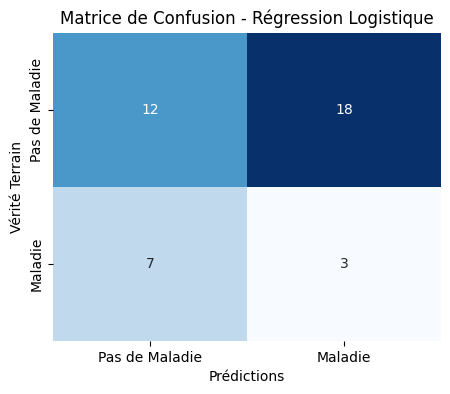

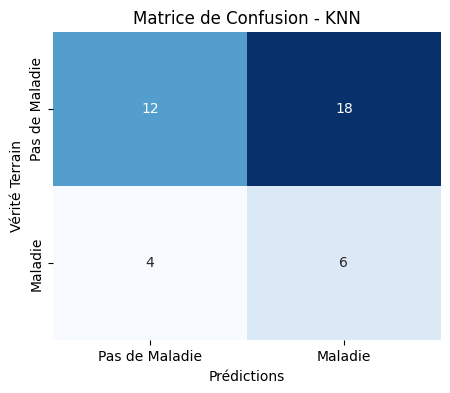

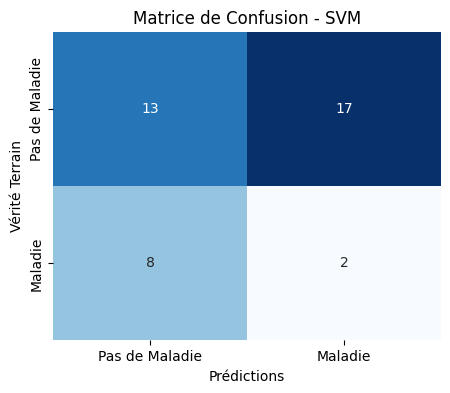

In [ ]:
# --------------------
# 1. Matrices de confusion
# --------------------
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pas de Maladie', 'Maladie'],
                yticklabels=['Pas de Maladie', 'Maladie'])
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.ylabel('Vérité Terrain')
    plt.xlabel('Prédictions')
    plt.show()

plot_confusion_matrix(y_test_class, y_pred_logistic, 'Régression Logistique')
plot_confusion_matrix(y_test_class, y_pred_knn, 'KNN')
plot_confusion_matrix(y_test_class, y_pred_svm, 'SVM')

**Visualisations des Performances des Modèles**

* **Matrices de Confusion**
 fournissent une représentation visuelle des performances des modèles de classification. Elles montrent le nombre de prédictions correctes et incorrectes, offrant ainsi une vue d'ensemble de la précision du modèle.
Chaque modèle a sa propre matrice de confusion, indiquant le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs.

* **Courbes ROC**
 (Receiver Operating Characteristic) montrent le compromis entre le taux de vrais positifs et le taux de faux positifs pour chaque modèle.
L'AUC (Area Under the Curve) est utilisée comme métrique pour quantifier la performance globale. Une AUC proche de 1 indique un modèle performant.

* **Graphiques de Résidus pour la Régression Linéaire** montre la distribution des erreurs de prédiction. Un bon modèle devrait avoir des résidus aléatoires, ce qui indique que le modèle a bien appris les relations entre les caractéristiques et la cible.
La ligne rouge représente l'axe des zéros ; les résidus devraient être uniformément répartis autour de cette ligne.

**Conclusion**

Les visualisations fournissent des informations essentielles sur la performance des modèles. Les matrices de confusion révèlent les points faibles des classificateurs, tandis que les courbes ROC et les AUC permettent d'évaluer leur efficacité. L'analyse des résidus pour la Régression Linéaire aide à comprendre la qualité des prédictions et à identifier d'éventuels problèmes dans le modèle.